<hr>
<h1>Reference:</h1>
https://stats.stackexchange.com/questions/8407/import-stock-price-from-yahoo-finance-into-r <br>
https://cran.r-project.org/web/packages/quantmod/quantmod.pdf <br>
<hr>

In [ ]:
# Get quantmod
if (!require("quantmod")) {
    install.packages("quantmod")
    library(quantmod)
}

start <- as.Date("2021-01-01")
end <- as.Date("2021-04-14")

# Let's get Apple stock data; Apple's ticker symbol is AAPL. We use the
# quantmod function getSymbols, and pass a string as a first argument to
# identify the desired ticker symbol, pass 'yahoo' to src for Yahoo!
# Finance, and from and to specify date ranges

# The default behavior for getSymbols is to load data directly into the
# global environment, with the object being named after the loaded ticker
# symbol. This feature may become deprecated in the future, but we exploit
# it now.

getSymbols("TSLA", src = "yahoo", from = start, to = end)

In [4]:
class(TSLA)

[1] "xts" "zoo"

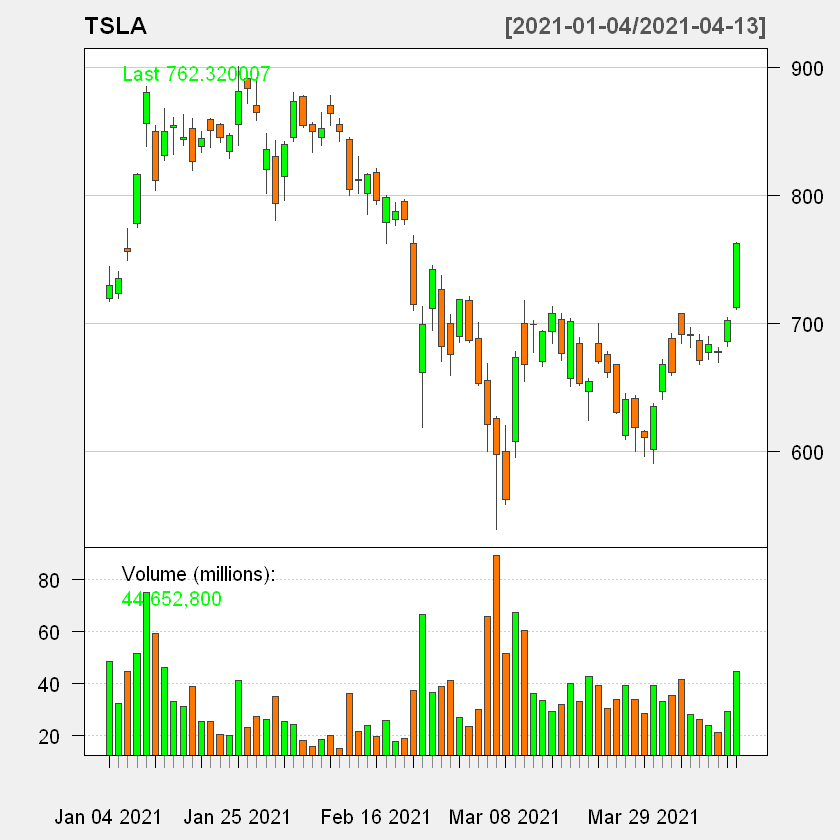

In [5]:
candleChart(TSLA, up.col='green', down.col='red', theme='white')

In [6]:
# convert AAPL xts objecct to a dataframe called df
# also convert the index to a column calledS date into the data frame
df <- data.frame(date=index(TSLA), coredata(TSLA))

In [7]:
head(df)

date,TSLA.Open,TSLA.High,TSLA.Low,TSLA.Close,TSLA.Volume,TSLA.Adjusted
2021-01-04,719.46,744.49,717.19,729.77,48638200,729.77
2021-01-05,723.66,740.84,719.20,735.11,32245200,735.11
2021-01-06,758.49,774.00,749.10,755.98,44700000,755.98
2021-01-07,777.63,816.99,775.20,816.04,51498900,816.04
2021-01-08,856.00,884.49,838.39,880.02,75055500,880.02
2021-01-11,849.40,854.43,803.62,811.19,59301600,811.19


# renaming columns in R
http://rprogramming.net/rename-columns-in-r/

In [8]:
names(df) <- c("Date", "Open", "High", "Low", "Close", "Volume", "Adjusted")
head(df)

Date,Open,High,Low,Close,Volume,Adjusted
2021-01-04,719.46,744.49,717.19,729.77,48638200,729.77
2021-01-05,723.66,740.84,719.20,735.11,32245200,735.11
2021-01-06,758.49,774.00,749.10,755.98,44700000,755.98
2021-01-07,777.63,816.99,775.20,816.04,51498900,816.04
2021-01-08,856.00,884.49,838.39,880.02,75055500,880.02
2021-01-11,849.40,854.43,803.62,811.19,59301600,811.19


In [9]:
# Add a new column Symbol and assign a value
df$Symbol <- 'TSLA'
head(df)

Date,Open,High,Low,Close,Volume,Adjusted,Symbol
2021-01-04,719.46,744.49,717.19,729.77,48638200,729.77,TSLA
2021-01-05,723.66,740.84,719.20,735.11,32245200,735.11,TSLA
2021-01-06,758.49,774.00,749.10,755.98,44700000,755.98,TSLA
2021-01-07,777.63,816.99,775.20,816.04,51498900,816.04,TSLA
2021-01-08,856.00,884.49,838.39,880.02,75055500,880.02,TSLA
2021-01-11,849.40,854.43,803.62,811.19,59301600,811.19,TSLA


# how to use ifelse function in R

In [10]:
df$UpDown <- ifelse (df$Open - df$Close >= 0, 0, 1)
df$up_down <- NULL # To remove a column in R set it to NULL
head(df)

Date,Open,High,Low,Close,Volume,Adjusted,Symbol,UpDown
2021-01-04,719.46,744.49,717.19,729.77,48638200,729.77,TSLA,1
2021-01-05,723.66,740.84,719.20,735.11,32245200,735.11,TSLA,1
2021-01-06,758.49,774.00,749.10,755.98,44700000,755.98,TSLA,0
2021-01-07,777.63,816.99,775.20,816.04,51498900,816.04,TSLA,1
2021-01-08,856.00,884.49,838.39,880.02,75055500,880.02,TSLA,1
2021-01-11,849.40,854.43,803.62,811.19,59301600,811.19,TSLA,0


In [11]:
df$PercentChange <- ((df$Close - df$Open)/df$Open) * 100
head(df)


Date,Open,High,Low,Close,Volume,Adjusted,Symbol,UpDown,PercentChange
2021-01-04,719.46,744.49,717.19,729.77,48638200,729.77,TSLA,1,1.4330220
2021-01-05,723.66,740.84,719.20,735.11,32245200,735.11,TSLA,1,1.5822327
2021-01-06,758.49,774.00,749.10,755.98,44700000,755.98,TSLA,0,-0.3309233
2021-01-07,777.63,816.99,775.20,816.04,51498900,816.04,TSLA,1,4.9393642
2021-01-08,856.00,884.49,838.39,880.02,75055500,880.02,TSLA,1,2.8060771
2021-01-11,849.40,854.43,803.62,811.19,59301600,811.19,TSLA,0,-4.4984693


In [12]:
# Total number of rows in the data frame
nrow(df)

head(df)

[1] 69

Date,Open,High,Low,Close,Volume,Adjusted,Symbol,UpDown,PercentChange
2021-01-04,719.46,744.49,717.19,729.77,48638200,729.77,TSLA,1,1.4330220
2021-01-05,723.66,740.84,719.20,735.11,32245200,735.11,TSLA,1,1.5822327
2021-01-06,758.49,774.00,749.10,755.98,44700000,755.98,TSLA,0,-0.3309233
2021-01-07,777.63,816.99,775.20,816.04,51498900,816.04,TSLA,1,4.9393642
2021-01-08,856.00,884.49,838.39,880.02,75055500,880.02,TSLA,1,2.8060771
2021-01-11,849.40,854.43,803.62,811.19,59301600,811.19,TSLA,0,-4.4984693


In [14]:
# total number of rows in the data frame
nrow(is.na(df))

# find the max open price
max(df$Open, na.rm=TRUE)

# find the min open price
min(df$Open, na.rm=TRUE)

# find the max Percent Change
max(df$PercentChange, na.rm=TRUE)

# find the min Percent Change
min(df$PercentChange, na.rm=TRUE)



[1] 69

[1] 891.38

[1] 600.55

[1] 10.7534

[1] -6.312284

In [15]:
# find the row with the max open price
df[df$Open == max(df$Open, na.rm=TRUE),]

# find the row with the lowest open price
df[df$Open == min(df$Open, na.rm=TRUE),]


,Date,Open,High,Low,Close,Volume,Adjusted,Symbol,UpDown,PercentChange
16,2021-01-26,891.38,895.9,871.6,883.09,23131600,883.09,TSLA,0,-0.9300156


,Date,Open,High,Low,Close,Volume,Adjusted,Symbol,UpDown,PercentChange
44,2021-03-08,600.55,620.13,558.79,563,51787000,563,TSLA,0,-6.252602


In [18]:
df.omit <- na.omit(df)

# total number of rows in the data frame
nrow(is.na(df.omit))

# find the max open price
max(df.omit$Open, na.rm=TRUE)

# find the min open price
min(df.omit$Open, na.rm=TRUE)

# find the max Percent Change
max(df.omit$PercentChange, na.rm=TRUE)

# find the min Percent Change
min(df.omit$PercentChange, na.rm=TRUE)


[1] 69

[1] 891.38

[1] 600.55

[1] 10.7534

[1] -6.312284

In [19]:
# When was the worst time for this stock?
df.omit[df.omit$PercentChange == min(df.omit$PercentChange, na.rm=TRUE),]

,Date,Open,High,Low,Close,Volume,Adjusted,Symbol,UpDown,PercentChange
34,2021-02-22,762.64,768.5,710.2,714.5,37269700,714.5,TSLA,0,-6.312284


<h3>Answer:</h3>
October 19, 1987 
https://www.forbes.com/sites/johndobosz/2012/10/19/crash-of-1987-haunts-this-october-stock-market/#6b7f36615e8e <br>

In [20]:
head(df.omit)

Date,Open,High,Low,Close,Volume,Adjusted,Symbol,UpDown,PercentChange
2021-01-04,719.46,744.49,717.19,729.77,48638200,729.77,TSLA,1,1.4330220
2021-01-05,723.66,740.84,719.20,735.11,32245200,735.11,TSLA,1,1.5822327
2021-01-06,758.49,774.00,749.10,755.98,44700000,755.98,TSLA,0,-0.3309233
2021-01-07,777.63,816.99,775.20,816.04,51498900,816.04,TSLA,1,4.9393642
2021-01-08,856.00,884.49,838.39,880.02,75055500,880.02,TSLA,1,2.8060771
2021-01-11,849.40,854.43,803.62,811.19,59301600,811.19,TSLA,0,-4.4984693


In [21]:
# syntax to get the help page for getSymbols() function in from quantmod
?getSymbols

In [22]:
# Get the dimension of the dataframe
dim(df)

[1] 69 10

Answer: 9670 rows with 10 columns or variables

In [23]:
# Add a new column DayOfWeek to the data frame
df$DayOfWeek <- weekdays(as.Date(df$Date))
head(df)

Date,Open,High,Low,Close,Volume,Adjusted,Symbol,UpDown,PercentChange,DayOfWeek
2021-01-04,719.46,744.49,717.19,729.77,48638200,729.77,TSLA,1,1.4330220,Monday
2021-01-05,723.66,740.84,719.20,735.11,32245200,735.11,TSLA,1,1.5822327,Tuesday
2021-01-06,758.49,774.00,749.10,755.98,44700000,755.98,TSLA,0,-0.3309233,Wednesday
2021-01-07,777.63,816.99,775.20,816.04,51498900,816.04,TSLA,1,4.9393642,Thursday
2021-01-08,856.00,884.49,838.39,880.02,75055500,880.02,TSLA,1,2.8060771,Friday
2021-01-11,849.40,854.43,803.62,811.19,59301600,811.19,TSLA,0,-4.4984693,Monday


<h3> Questions:</h3>
<ul>
    <li> How many times was AAPL up throughout history? </li>
    <li> How many times was AAPL down throught history? </li>
</ul>

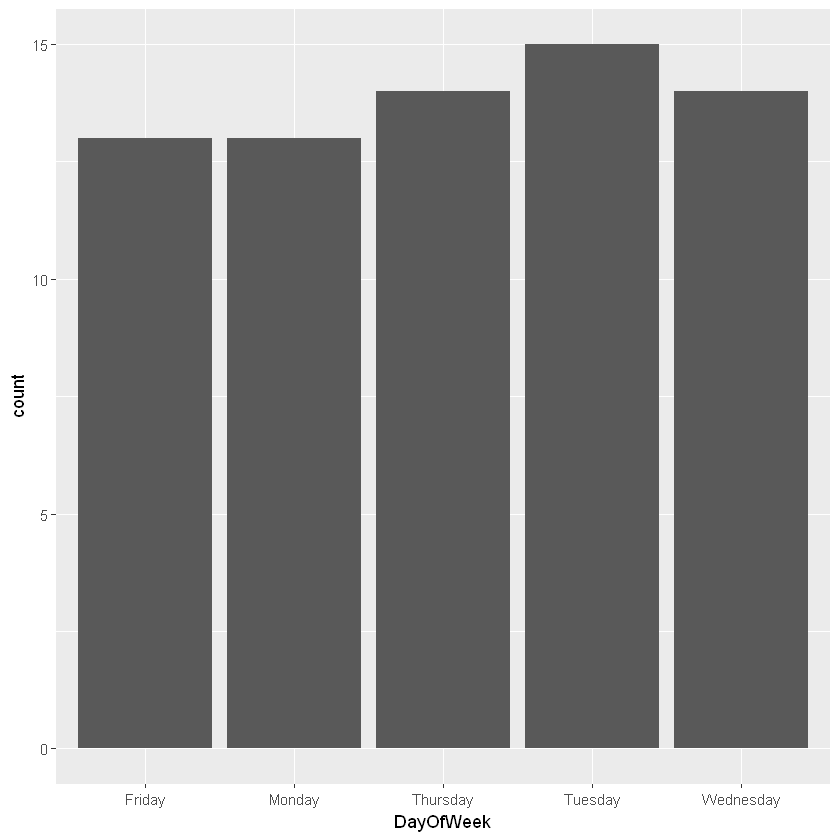

In [24]:
library(ggplot2)

# counts (or sums of weights)
g <- ggplot(df, aes(DayOfWeek))
# Number of cars in each class:
g + geom_bar()